<a target="_blank" href="https://colab.research.google.com/github/masood/2024-pets-privacy-labels-policies/blob/main/dataset.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Accessing Dataset of Apple App Store and Policy (Demo)

In [1]:
!pip install huggingface-hub

In [2]:
from huggingface_hub import hf_hub_download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Download Data Files

In [3]:
REPO_ID = "masoodali/apple-app-store-labels-policies"
FILENAME = "app_store/apps.csv"

In [4]:
def get_dataframe(FILENAME):
    return pd.read_csv(
        hf_hub_download(repo_id=REPO_ID, filename=FILENAME, repo_type="dataset")
    )

In [5]:
# App Metadata
app_metadata = get_dataframe(FILENAME="app_store/apps.csv")

# App Store Labels
app_store_labels = get_dataframe(FILENAME="app_store/app_store_labels.csv")

# App to Policy Mapping
app_to_policy = get_dataframe(FILENAME="app_store/app-to-policy.csv")

# Policy Labels
policy_labels = get_dataframe(FILENAME="privacy_policy/policy_labels.csv")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


apps.csv:   0%|          | 0.00/410M [00:00<?, ?B/s]

app_store_labels.csv:   0%|          | 0.00/147M [00:00<?, ?B/s]

app-to-policy.csv:   0%|          | 0.00/74.0M [00:00<?, ?B/s]

policy_labels.csv:   0%|          | 0.00/459M [00:00<?, ?B/s]

In [6]:
app_to_policy

,app_table_id,app_store_id,privacy_policy_url,privacy_policy_index
0,130243682,1023873772,https://www.partnersoftware.com/terms-of-use/,0
1,130243683,1501237924,https://cognify.app/legal/,1
2,130243684,1591780100,https://www.perimeter.com.my/legal/privacy-pol...,2
3,130243685,1327764448,https://goo.gl/fj7faZ,3
4,130243686,1563607064,http://bc.streamers.network/privacy,4
...,...,...,...,...
995727,131483316,1190166334,http://taiwanglassgroup.cn/information_list.ph...,432112
995728,131483317,1604566453,https://fauder.github.io/Emotional-Bond,670144
995729,131483319,313639973,http://start.speedymarks.com/policies/privacyP...,2128
995730,131483320,1569395974,https://mkdosaa.co.uk/,670145


# Total Evaluated Apps

In [7]:
evaluated_app_ids = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels['app_table_id'].to_list())].loc[app_to_policy['privacy_policy_index'].isin(policy_labels['policy_id'].to_list())]['app_store_id'].to_list()))
total_apps = len(evaluated_app_ids)
total_apps

474669

# Privacy Types

In [8]:
privacy_type = 'privacy_type_track'
app_store_track = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
policy_track = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

privacy_type = 'privacy_type_linked'
app_store_linked = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
policy_linked = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

privacy_type = 'privacy_type_not_linked'
app_store_not_linked = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
policy_not_linked = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

privacy_type = 'privacy_type_not_collected'
app_store_not_collected = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
policy_not_collected = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))
policy_not_collected = list(set(policy_not_collected) - set(policy_track))
policy_not_collected = list(set(policy_not_collected) - set(policy_linked))
policy_not_collected = list(set(policy_not_collected) - set(policy_not_linked))


In [9]:
def plot_privacy_types():
    def major_formatter(x, pos):
        label = str(-x) if x < 0 else str(x)
        return label

    labels = ['Data\n Used to\n Track\n You', 'Data\n Linked\n to You', 'Data\n Not\n Linked\n to You', 'Data\n Not\n Collected']

    # Create a figure.
    fig = plt.figure()

    # Set the font size.
    plt.rcParams['font.size'] = '10'

    # Set the figure size.
    fig.set_size_inches(10, 4.1)


    # App Store
    app_store_values = [len(set(app_store_track)-set(policy_track)), len(set(app_store_linked)-set(policy_linked)), len(set(app_store_not_linked)-set(policy_not_linked)), len(set(app_store_not_collected)-set(policy_not_collected))]
    app_store = [x * -100 / total_apps for x in app_store_values]
    app_store_color = ['#F5B7B1', '#FFEF00', '#ABD9E9', '#B8E186']

    polisis_values = [len(set(policy_track)-set(app_store_track)), len(set(policy_linked)-set(app_store_linked)), len(set(policy_not_linked)-set(app_store_not_linked)), len(set(policy_not_collected)-set(app_store_not_collected))]
    polisis = [x * 100 / total_apps for x in polisis_values]
    polisis_color = ['#D7191C', '#FFA62F', '#191970', '#4dac26']

    overlap_values = [len(set(policy_track).intersection(set(app_store_track))), len(set(policy_linked).intersection(set(app_store_linked))), len(set(policy_not_linked).intersection(set(app_store_not_linked))), len(set(policy_not_collected).intersection(set(app_store_not_collected)))]
    overlap = [x * -100 / total_apps for x in overlap_values]
    overlap_color = ['#E66866', '#FFCA18', '#6279AC', '#82C656']

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [overall_values[0] * 0.14, overall_values[1] * 0.17, overall_values[2] * 0.14, overall_values[3] * 0.23]
    error = [x * 100 / total_apps for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax1 = fig.add_subplot(141)
    ax1.set_ylim([-100, 110])

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    rects1 = ax1.bar(x, app_store, width, bottom=overlap, label='Label Only', color=app_store_color, edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax1.bar(x, overlap, width, label='Both', color=overlap_color, edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax1.bar(x, overlap, width, color=overlap_color,
                    edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax1.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color=polisis_color, edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_xticks(x, labels)

    from matplotlib.patches import Patch
    pa1 = Patch(facecolor='#F5B7B1', edgecolor='black', hatch="\\\\\\", alpha=0.75)
    pa2 = Patch(facecolor='#FFEF00', edgecolor='black', hatch="\\\\\\", alpha=0.75)
    pa3 = Patch(facecolor='#ABD9E9', edgecolor='black', hatch="\\\\\\", alpha=0.75)
    pa4 = Patch(facecolor='#B8E186', edgecolor='black', hatch="\\\\\\", alpha=0.75)
    #
    pb1 = Patch(facecolor='#E66866', edgecolor='black', hatch="xxx", alpha=0.6)
    pb2 = Patch(facecolor='#FFCA18', edgecolor='black', hatch="xxx", alpha=0.6)
    pb3 = Patch(facecolor='#6279AC', edgecolor='black', hatch="xxx", alpha=0.6)
    pb4 = Patch(facecolor='#82C656', edgecolor='black', hatch="xxx", alpha=0.6)
    #
    pc1 = Patch(facecolor='#D7191C', edgecolor='black', hatch="///", alpha=0.75)
    pc2 = Patch(facecolor='#FFA62F', edgecolor='black', hatch="///", alpha=0.75)
    pc3 = Patch(facecolor='#191970', edgecolor='black', hatch="///", alpha=0.75)
    pc4 = Patch(facecolor='#4dac26', edgecolor='black', hatch="///", alpha=0.75)
    ax1.legend(handles=[pa1, pb1, pc1, pa2, pb2, pc2, pa3, pb3, pc3, pa4, pb4, pc4],
            labels=['', '', '', '', '', '', '', '', '', 'Label Only', 'Both', 'Policy Only'],
            ncol=4, handletextpad=0.5, handlelength=1.0, columnspacing=-0.75,
            loc='lower left', fontsize=9)

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax1.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax1.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Show the grid lines.
    ax1.grid(True, axis='y')
    ax1.set_axisbelow(True)

    # change the fontsize
    ax1.tick_params(axis='x', labelsize=10, pad=0)

    # Set the label text for the first y-axis.
    ax1.yaxis.set_label_text('Privacy Type Ratio', fontsize=10)
    ax1.yaxis.set_label_text('Privacy Policty       Privacy Label', rotation=-90, fontsize=10,   weight='bold')
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.labelpad = 15

    ax1.yaxis.set_major_formatter(major_formatter)


    # Adjust the space between the sub plots.
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.00)

    ax1.axhline(0, linewidth=3, color='black')

    plt.show()


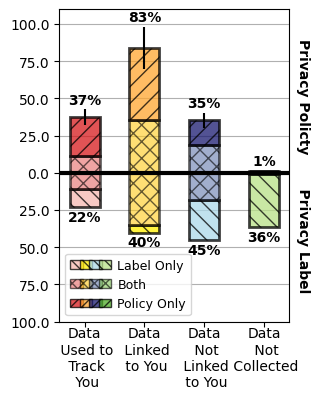

In [10]:
plot_privacy_types()

# Purposes

In [11]:
# DATA_LINKED_TO_YOU (YELLOW)
privacy_type = 'privacy_type_linked'
linked_total = len(list(set(policy_linked) | set(app_store_linked)))

purpose = 'purpose_app_functionality'
l_app_store_purpose_app_functionality = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_app_functionality = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_analytics'
l_app_store_purpose_analytics = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_analytics = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_product_personalization'
l_app_store_purpose_product_personalization = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_product_personalization = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_third_party_advertising'
l_app_store_purpose_third_party_advertising = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_third_party_advertising = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_developer_advertising_marketing'
l_app_store_purpose_developer_advertising_marketing = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_developer_advertising_marketing = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_other'
l_app_store_purpose_other = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_other = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))


In [12]:
# DATA_NOT_LINKED_TO_YOU (BLUE)
privacy_type = 'privacy_type_not_linked'
not_linked_total = len(list(set(policy_not_linked) | set(app_store_not_linked)))

purpose = 'purpose_app_functionality'
nl_app_store_purpose_app_functionality = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_app_functionality = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_analytics'
nl_app_store_purpose_analytics = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_analytics = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_product_personalization'
nl_app_store_purpose_product_personalization = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_product_personalization = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_third_party_advertising'
nl_app_store_purpose_third_party_advertising = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_third_party_advertising = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_developer_advertising_marketing'
nl_app_store_purpose_developer_advertising_marketing = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_developer_advertising_marketing = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_other'
nl_app_store_purpose_other = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_other = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

In [13]:
def plot_purposes():
    def hex_to_rgb(value):
        value = value.lstrip('#')
        lv = len(value)
        return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


    def rgb_to_hex(rgb):
        return '%02x%02x%02x' % rgb


    def mean_color(color1, color2):
        rgb1 = hex_to_rgb(color1)
        rgb2 = hex_to_rgb(color2)

        avg = lambda x, y: round((x+y) / 2)

        new_rgb = ()

        for i in range(len(rgb1)):
            new_rgb += (avg(rgb1[i], rgb2[i]),)

        return '#'+rgb_to_hex(new_rgb)

    def major_formatter(x, pos):
        label = str(-x) if x < 0 else str(x)
        return label

    labels = ['App\n Functio-\n nality', 'Analyt-\n ics', 'Product\n Persona-\n lization', 'Third\n Party\n Advert-\n ising', 'Devel-\n opers\n Advert-\n ising', 'Other\n Purp-\n oses']

    # Create a figure.
    fig = plt.figure()

    # Set the font size.
    plt.rcParams['font.size'] = '9'

    # Set the figure size.
    # fig.set_size_inches(10.5, 6.0)
    fig.set_size_inches(6, 2.75)


    """
    Data Linked to You
    """

    app_store_values = [len(set(l_app_store_purpose_app_functionality)-set(l_policy_purpose_app_functionality)), len(set(l_app_store_purpose_analytics)-set(l_policy_purpose_analytics)), len(set(l_app_store_purpose_product_personalization)-set(l_policy_purpose_product_personalization)), len(set(l_app_store_purpose_third_party_advertising)-set(l_policy_purpose_third_party_advertising)), len(set(l_app_store_purpose_developer_advertising_marketing)-set(l_policy_purpose_developer_advertising_marketing)), len(set(l_app_store_purpose_other)-set(l_policy_purpose_other))]
    app_store = [x * (-100) / linked_total for x in app_store_values]

    polisis_values = [len(set(l_policy_purpose_app_functionality)-set(l_app_store_purpose_app_functionality)), len(set(l_policy_purpose_analytics)-set(l_app_store_purpose_analytics)), len(set(l_policy_purpose_product_personalization)-set(l_app_store_purpose_product_personalization)), len(set(l_policy_purpose_third_party_advertising)-set(l_app_store_purpose_third_party_advertising)), len(set(l_policy_purpose_developer_advertising_marketing)-set(l_app_store_purpose_developer_advertising_marketing)), len(set(l_policy_purpose_other)-set(l_app_store_purpose_other))]
    polisis = [x * (100) / linked_total for x in polisis_values]

    overlap_values = [len(set(l_policy_purpose_app_functionality).intersection(set(l_app_store_purpose_app_functionality))), len(set(l_policy_purpose_analytics).intersection(set(l_app_store_purpose_analytics))), len(set(l_policy_purpose_product_personalization).intersection(set(l_app_store_purpose_product_personalization))), len(set(l_policy_purpose_third_party_advertising).intersection(set(l_app_store_purpose_third_party_advertising))), len(set(l_policy_purpose_developer_advertising_marketing).intersection(set(l_app_store_purpose_developer_advertising_marketing))), len(set(l_policy_purpose_other).intersection(set(l_app_store_purpose_other)))]
    overlap = [x * (-100) / linked_total for x in overlap_values]

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Exclusively Purpose Errors:
    # App Functionality: 1 - (0.90 * ((0.84 + 0.84 + 0.9) / 3)) = 0.23
    # Analytics: 1 - (0.90 * 0.89) = 0.20
    # Product Personalization: 1 - (0.90 * 0.86) = 0.23
    # Third-party Advertising: 1 - (0.92 * 0.94) = 0.14
    # Developers Advertising: 1 - (0.89 * 0.94) = 0.16
    # Other Purposes: 1 - (0.90 * ((0.97 + 0.89 + 0.78) / 3)) = 0.21

    # Purpose + Data Linked to You (i.e., Identifiable only):
    # App Functionality: 1 - (0.92 * 0.90 * ((0.84 + 0.84 + 0.9) / 3)) = 0.29
    # Analytics: 1 - (0.92 * 0.90 * 0.89) = 0.26
    # Product Personalization: 1 - (0.92 * 0.90 * 0.86) = 0.29
    # Third-party Advertising: 1 - (0.92 * 0.92 * 0.94) = 0.20
    # Developers Advertising: 1 - (0.92 * 0.89 * 0.94) = 0.23
    # Other Purposes: 1 - (0.92 * 0.90 * ((0.97 + 0.89 + 0.78) / 3)) = 0.27

    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [overall_values[0] * 0.29, overall_values[1] * 0.26, overall_values[2] * 0.29, overall_values[3] * 0.20, overall_values[4] * 0.23, overall_values[5] * 0.27]
    # Percentage of Overall Error:
    error = [x * 100 / linked_total for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax2 = fig.add_subplot(121)
    ax2.set_ylim([-145, 145])
    ax2.set_title('Data Linked\n to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    # DATA LINKED TO YOU: App Store = '#FFEF00'
    # DATA LINKED TO YOU: Polisis = '#FFA62F'
    # DATA LINKED TO YOU: Overlap = mean_color('#FFEF00','#FFA62F') = '#FFCA18'
    rects1 = ax2.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#FFEF00', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax2.bar(x, overlap, width, label='Both', color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax2.bar(x, overlap, width, color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black',
                    linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax2.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#FFA62F', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_xticks(x, labels, fontsize=9)

    # Set the rotation for the xaxis
    ax2.set_xticklabels(ax2.get_xticklabels(), ha='center')

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax2.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax2.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')


    # (handles, labels) = (ax2.get_legend_handles_labels())
    # ax2.legend(handles[::-1], labels[::-1], loc='lower right')

    ax2.legend(ax2.get_legend_handles_labels()[0][::-1], ax2.get_legend_handles_labels()[1][::-1], loc='lower right', prop={'size': 7})

    # Show the grid lines.
    ax2.grid(True, axis='y')
    ax2.set_axisbelow(True)

    # change the fontsize
    ax2.tick_params(axis='x', labelsize=9, pad=0)

    ax2.yaxis.set_major_formatter(major_formatter)

    # Set the label text for the first y-axis.
    ax2.yaxis.set_label_text('Privacy Type Ratio', fontsize=10)

    # Remove little ticks on y-axis.
    # for tick in ax2.yaxis.get_major_ticks():
    #     tick.tick1line.set_visible(False)
    #     tick.tick2line.set_visible(False)
    #     tick.label1.set_visible(False)
    #     tick.label2.set_visible(False)


    """
    Data Not Linked to You
    """


    app_store_values = [len(set(nl_app_store_purpose_app_functionality)-set(nl_policy_purpose_app_functionality)), len(set(nl_app_store_purpose_analytics)-set(nl_policy_purpose_analytics)), len(set(nl_app_store_purpose_product_personalization)-set(nl_policy_purpose_product_personalization)), len(set(nl_app_store_purpose_third_party_advertising)-set(nl_policy_purpose_third_party_advertising)), len(set(nl_app_store_purpose_developer_advertising_marketing)-set(nl_policy_purpose_developer_advertising_marketing)), len(set(nl_app_store_purpose_other)-set(nl_policy_purpose_other))]
    app_store = [x * (-100) / not_linked_total for x in app_store_values]

    polisis_values = [len(set(nl_policy_purpose_app_functionality)-set(nl_app_store_purpose_app_functionality)), len(set(nl_policy_purpose_analytics)-set(nl_app_store_purpose_analytics)), len(set(nl_policy_purpose_product_personalization)-set(nl_app_store_purpose_product_personalization)), len(set(nl_policy_purpose_third_party_advertising)-set(nl_app_store_purpose_third_party_advertising)), len(set(nl_policy_purpose_developer_advertising_marketing)-set(nl_app_store_purpose_developer_advertising_marketing)), len(set(nl_policy_purpose_other)-set(nl_app_store_purpose_other))]
    polisis = [x * (100) / not_linked_total for x in polisis_values]

    overlap_values = [len(set(nl_policy_purpose_app_functionality).intersection(set(nl_app_store_purpose_app_functionality))), len(set(nl_policy_purpose_analytics).intersection(set(nl_app_store_purpose_analytics))), len(set(nl_policy_purpose_product_personalization).intersection(set(nl_app_store_purpose_product_personalization))), len(set(nl_policy_purpose_third_party_advertising).intersection(set(nl_app_store_purpose_third_party_advertising))), len(set(nl_policy_purpose_developer_advertising_marketing).intersection(set(nl_app_store_purpose_developer_advertising_marketing))), len(set(nl_policy_purpose_other).intersection(set(nl_app_store_purpose_other)))]
    overlap = [x * (-100) / not_linked_total for x in overlap_values]


    # Exclusively Purpose Errors:
    # App Functionality: 1 - (0.90 * ((0.84 + 0.84 + 0.9) / 3)) = 0.23
    # Analytics: 1 - (0.90 * 0.89) = 0.20
    # Product Personalization: 1 - (0.90 * 0.86) = 0.23
    # Third-party Advertising: 1 - (0.92 * 0.94) = 0.14
    # Developers Advertising: 1 - (0.89 * 0.94) = 0.16
    # Other Purposes: 1 - (0.90 * ((0.97 + 0.89 + 0.78) / 3)) = 0.21

    # Purpose + Data Not Linked to You (i.e., Aggregated/Anonymized only):
    # App Functionality: 1 - (0.96 * 0.90 * ((0.84 + 0.84 + 0.9) / 3)) = 0.26
    # Analytics: 1 - (0.96 * 0.90 * 0.89) = 0.23
    # Product Personalization: 1 - (0.96 * 00.90 * 0.86) = 0.26
    # Third-party Advertising: 1 - (0.96 * 0.92 * 0.94) = 0.17
    # Developers Advertising: 1 - (0.96 * 0.89 * 0.94) = 0.20
    # Other Purposes: 1 - (0.96 * 0.90 * ((0.97 + 0.89 + 0.78) / 3)) = 0.24

    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [overall_values[0] * 0.26, overall_values[1] * 0.23, overall_values[2] * 0.26, overall_values[3] * 0.17, overall_values[4] * 0.20, overall_values[5] * 0.24]
    # Percentage of Overall Error:
    error = [x * 100 / not_linked_total for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax3 = fig.add_subplot(122)
    ax3.set_ylim([-145, 145])
    ax3.set_title('Data Not\n Linked to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    # DATA NOT LINKED TO YOU: App Store = '#ABD9E9'
    # DATA NOT LINKED TO YOU: Polisis = '#191970'
    # DATA NOT LINKED TO YOU: Overlap = mean_color('#ABD9E9','#191970') = '#6279AC'
    rects1 = ax3.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#ABD9E9', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax3.bar(x, overlap, width, label='Both', color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax3.bar(x, overlap, width, color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax3.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#191970', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_xticks(x, labels)

    # Set the rotation for the xaxis
    ax3.set_xticklabels(ax3.get_xticklabels(), ha='center')

    ax3.legend(ax3.get_legend_handles_labels()[0][::-1], ax3.get_legend_handles_labels()[1][::-1], loc='lower right', prop={'size': 7})

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax3.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax3.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Show the grid lines.
    ax3.grid(True, axis='y')
    ax3.set_axisbelow(True)

    # change the fontsize
    ax3.tick_params(axis='x', labelsize=9, pad=0)

    # Remove little ticks on y-axis.
    for tick in ax3.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

    # Set the label text for the first y-axis.
    ax3.yaxis.set_label_text('Privacy Policy$\quad\quad$Privacy Label', rotation=-90, fontsize=8)
    ax3.yaxis.set_label_position("right")
    ax3.yaxis.labelpad = 15


    # Adjust the space between the sub plots.
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.03)

    # ax1.axhline(0, linewidth=3, color='black')
    ax2.axhline(0, linewidth=3, color='black')
    ax3.axhline(0, linewidth=3, color='black')
    # ax4.axhline(0, linewidth=3, color='black')

    # Adjust the space between the sub plots.
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05)

    # Show/Save the figure.
    plt.show()

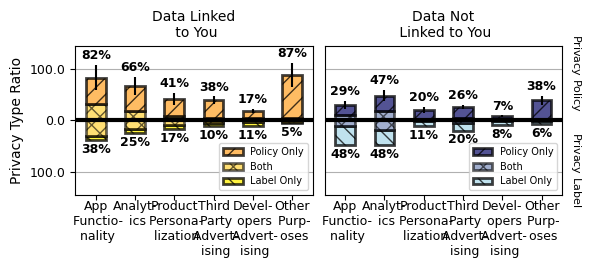

In [14]:
plot_purposes()